In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tabulate import tabulate
from scipy.linalg import svd

In [10]:
def show(image):
    """Show an image"""
    img = plt.imshow(image, cmap='gray', vmin=0, vmax=1)
    plt.axis("off")
    plt.show()


def to_gray(image):
    """Convert a four channel image to gray"""
    return cv2.cvtColor(image, cv2.COLOR_RGBA2GRAY)


def printf(matrix, decimals=1):
    """Print a formatted matrix"""
    print(tabulate(np.around(matrix, decimals=decimals)))


def print_svd(svd_result):
    U, s, VT = svd_result
    print("=== U ===")
    printf(U)
    print("=== sigma ===")
    printf(np.diag(s))
    print("=== V transpose ===")
    printf(VT)


def product_svd(svd_result):
    U, s, VT = svd_result
    return np.dot(U, np.dot(np.diag(s), VT))

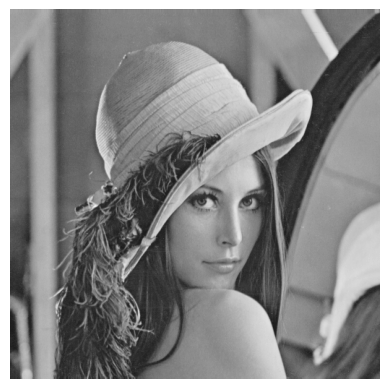

In [1112]:
image = to_gray(imread('images/lena.png'))
# image = cv2.resize(image, (512, 512))
show(image)

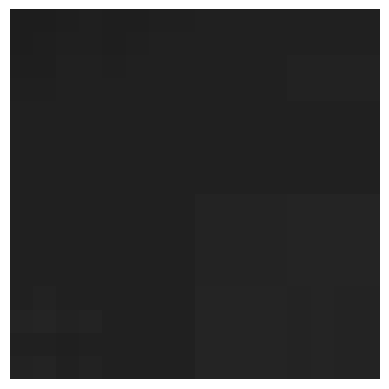

---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1
0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.1  0.

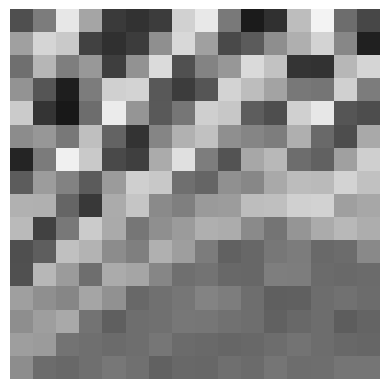

---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---  ---
0.3  0.5  0.9  0.6  0.2  0.2  0.2  0.8  0.9  0.5  0.1  0.2  0.7  1    0.4  0.3
0.6  0.8  0.8  0.3  0.2  0.2  0.6  0.8  0.6  0.3  0.4  0.6  0.7  0.8  0.5  0.1
0.4  0.7  0.5  0.6  0.2  0.6  0.9  0.3  0.5  0.6  0.9  0.8  0.2  0.2  0.7  0.8
0.6  0.3  0.1  0.5  0.8  0.8  0.3  0.2  0.3  0.8  0.7  0.6  0.5  0.5  0.8  0.5
0.8  0.2  0.1  0.4  0.9  0.6  0.4  0.5  0.8  0.8  0.4  0.3  0.8  0.9  0.3  0.3
0.5  0.6  0.5  0.7  0.4  0.2  0.5  0.7  0.8  0.6  0.5  0.5  0.7  0.4  0.3  0.7
0.1  0.5  0.9  0.8  0.3  0.2  0.7  0.9  0.5  0.3  0.7  0.7  0.4  0.4  0.6  0.8
0.4  0.6  0.5  0.4  0.6  0.8  0.8  0.4  0.4  0.6  0.5  0.7  0.7  0.7  0.8  0.8
0.7  0.7  0.4  0.2  0.7  0.8  0.5  0.5  0.6  0.6  0.7  0.7  0.8  0.8  0.6  0.7
0.7  0.3  0.5  0.8  0.7  0.5  0.6  0.6  0.7  0.7  0.5  0.5  0.6  0.7  0.7  0.7
0.3  0.4  0.8  0.7  0.6  0.5  0.7  0.6  0.5  0.4  0.4  0.5  0.5  0.4  0.4  0.5
0.3  0.7  0.6  0.4  0.7  0.6  0.5  0.4  0.5  0.4  0.

In [12]:
indices = [(0, 0), (14, 14)]
for (i, j) in indices:
    block = image[16*i:16*(i+1), 16*i:16*(i+1)]
    show(block)
    printf(block)
    print_svd(svd(block))

In [817]:
 
from math import log10, sqrt 
def PSNR(original, compressed): 
    mse = np.mean((original - compressed) ** 2) 
    if(mse == 0):  # MSE is zero means no noise is present in the signal . 
                  # Therefore PSNR have no importance. 
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse)) 
    return psnr

In [1110]:
a = np.random.random((8,8))
usv = svd(a)
# printf(usv[0])
# print(np.abs(np.diff(usv[0][:,0])))
print(usv[0][6:,0])
print("sum:",sum(np.diff(usv[0][6:,0])))
print("rank",sum(usv[1]>.0001))
# printf(usv[0])
usv[0][6][0],usv[0][7][0] = usv[0][7][0], usv[0][6][0]
# printf(usv[0])
b = product_svd(usv)
print(PSNR(a, b))
# show(a)
# show(b)
print("a")
printf(a)
print("b")
printf(b)
print_svd(svd(b))

[-0.36546318 -0.37676316]
sum: -0.011299980937099496
rank 8
89.68711598560809
a
---  ---  ---  ---  ---  ---  ---  ---
0.2  0    1    0.7  0.6  0.5  0.5  0.3
0.9  0.2  0.4  0.8  0.6  0.9  0.3  0.5
0.1  0.4  0.7  0.7  0.5  0.4  1    0.8
0.6  0.4  0.8  0.3  0.1  0.2  0.6  0.9
0.2  0.2  0.4  0.7  0.5  0.4  0.2  0.3
0.7  0.8  0.9  0.5  0    0.1  0.9  0.3
0.9  0.7  0.3  0.8  0.3  0.5  0.3  0.6
0.2  0.7  0.8  0.6  0.4  0.8  0.4  0.4
---  ---  ---  ---  ---  ---  ---  ---
b
---  ---  ---  ---  ---  ---  ---  ---
0.2  0    1    0.7  0.6  0.5  0.5  0.3
0.9  0.2  0.4  0.8  0.6  0.9  0.3  0.5
0.1  0.4  0.7  0.7  0.5  0.4  1    0.8
0.6  0.4  0.8  0.3  0.1  0.2  0.6  0.9
0.2  0.2  0.4  0.7  0.5  0.4  0.2  0.3
0.7  0.8  0.9  0.5  0    0.1  0.9  0.3
0.9  0.7  0.3  0.8  0.3  0.5  0.4  0.7
0.2  0.7  0.8  0.6  0.4  0.8  0.4  0.4
---  ---  ---  ---  ---  ---  ---  ---
=== U ===
----  ----  ----  ----  ----  ----  ----  ----
-0.3  -0.2  -0.6   0     0.5  -0     0    -0.6
-0.4  -0.6   0.2   0.2   0.3   0.1

In [15]:
printf(b)

---  ---
2.6  4.3
1.4  1.7
---  ---


In [591]:
a =np.array( [.5, .6, .6, .3])

In [590]:
a

[]

In [594]:
sum(np.diff(a*-1))

0.2

In [55]:
a

[0.5, 0.6, 0.6, 0.3]

In [62]:
sum(np.diff(a[::-1]))

0.2

In [1114]:
np.diff([1,4,2,5,7])

array([ 3, -2,  3,  2])

In [1115]:
np.diff([1,4,2,7,5])

array([ 3, -2,  5, -2])

In [1116]:
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [1117]:
a = np.random.random((5,5))
print(a)

[[0.65679692 0.36357383 0.35568006 0.02511961 0.14993824]
 [0.03573787 0.9904829  0.82261298 0.82741365 0.81769686]
 [0.82751252 0.80051659 0.58986375 0.65372389 0.23066983]
 [0.60509716 0.32181726 0.20526426 0.07801932 0.93846552]
 [0.87538328 0.68120278 0.89069541 0.43004198 0.2861429 ]]


In [1118]:
print(svd(a)[0])

[[-0.25788518  0.43330003 -0.05508101 -0.21588856 -0.83432879]
 [-0.55404408 -0.79093056  0.07621068 -0.13180464 -0.21043638]
 [-0.50161384  0.23782835  0.31332905  0.76821495  0.05909242]
 [-0.32852972  0.07600957 -0.91776903  0.1232232   0.16972573]
 [-0.51670316  0.35261898  0.22512871 -0.57504912  0.47677381]]


In [1121]:
u, s, v = svd(a)
u[0, 0], u[1, 0] = u[1, 0], u[0, 0]
print(svd(product_svd((u, s, v)))[0])

[[-0.56452664  0.22132077 -0.0512466  -0.20401159 -0.76686364]
 [-0.2169833  -0.94968088  0.16966412 -0.11483582 -0.09513832]
 [-0.50240024  0.06346613  0.32999644  0.78075486  0.15839903]
 [-0.32913065 -0.12414991 -0.89750564  0.13064234  0.23168085]
 [-0.52296743  0.17228522  0.23275276 -0.56439918  0.56930008]]
